In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('TelcoChurn.xlsx')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Customer ID is uniwue for each customer and will not be helpful in prediction
data.drop('customerID',axis=1,inplace=True)
data.shape

(7043, 20)

In [13]:
# Dependent variable churn is Yes or No which needs to be converted into numeric form for modelling
data['target'] = np.where(data['Churn']=='Yes',1,0)
data.drop('Churn',axis=1,inplace=True)

In [14]:
data.target.value_counts()

0    5174
1    1869
Name: target, dtype: int64

In [15]:
y = data[['target']]
X = data.drop('target',axis=1)


In [16]:
# Finding the churn rate
y.mean()

target    0.26537
dtype: float64

In [18]:
# Splitting into numerical and categorical 

num = X.select_dtypes(include="number")
cat = X.select_dtypes(include="object")

In [19]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [20]:
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [22]:
# Although SeniorCitizen column datatype in integer but its working as categorical variable
ind = num[['SeniorCitizen']]
num.drop('SeniorCitizen',axis=1,inplace=True)

In [23]:
ind.head()

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0


***Outlier Removal***

In [24]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

# In case of TotalCharges 99% of data is less than 8039 but 1% data is greater than 8039

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


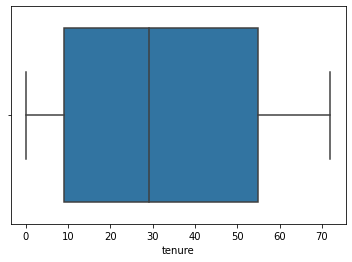

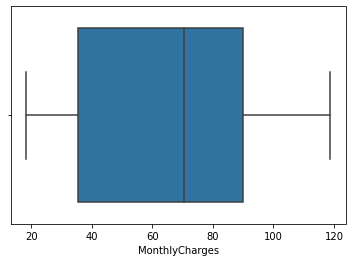

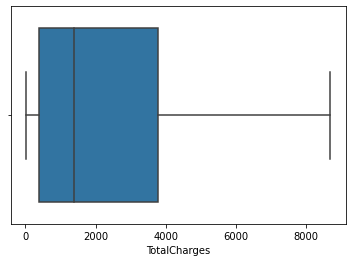

In [28]:
for i in num.columns:
  sns.boxplot(num[i])
  plt.show()

In [29]:
# method to remove first and last 1% of any variable
# Although as pre boxplot most significant data is Q3-Q1, if we take that data only standard deviation will change significantly
def outlier_remove(x):
  x = x.clip(lower=x.quantile(0.01))
  x = x.clip(upper=x.quantile(0.99))
  return x

In [30]:
num = num.apply(lambda x:outlier_remove(x))

Remove features with zero varience

In [34]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold=0)
varselector.fit_transform(num)
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [35]:
# Here no columns are dropped as none ishaving zero varience
num_1.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
